In [1]:
!pip install scrapy

  Using cached Scrapy-2.6.1-py2.py3-none-any.whl (264 kB)
  Using cached lxml-4.9.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (7.0 MB)
  Using cached Twisted-22.4.0-py3-none-any.whl (3.1 MB)
  Using cached w3lib-1.22.0-py2.py3-none-any.whl (20 kB)
  Using cached cssselect-1.1.0-py2.py3-none-any.whl (16 kB)
  Using cached service_identity-21.1.0-py2.py3-none-any.whl (12 kB)
  Using cached itemloaders-1.0.4-py3-none-any.whl (11 kB)
  Using cached itemadapter-0.6.0-py3-none-any.whl (10 kB)
  Using cached parsel-1.6.0-py2.py3-none-any.whl (13 kB)
  Using cached queuelib-1.6.2-py2.py3-none-any.whl (13 kB)
  Using cached PyDispatcher-2.0.5-py3-none-any.whl
  Using cached zope.interface-5.4.0-cp39-cp39-manylinux2010_x86_64.whl (255 kB)
  Using cached tldextract-3.3.0-py3-none-any.whl (93 kB)
  Using cached Protego-0.2.1-py2.py3-none-any.whl (8.2 kB)
  Using cached jmespath-1.0.0-py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 

In [1]:
import scrapy
import os
import logging 
from scrapy.crawler import CrawlerProcess

import pandas as pd

In [2]:
hotels = pd.read_json('results/booking.json')

In [3]:
hotels.head()

,hotel_name,url,city,ratings,description
0,Hotel De La Digue,https://www.booking.com/hotel/fr/de-la-digue.f...,Le Mont-Saint-Michel,"7,2",L'hôtel De La Digue est un établissement tradi...
1,Hôtel Vert,https://www.booking.com/hotel/fr/vert.fr.html?...,Le Mont-Saint-Michel,"8,1","Situé à 2 km du Mont-Saint-Michel, sur la côte..."
2,Hotel Gabriel,https://www.booking.com/hotel/fr/hotel-gabriel...,Le Mont-Saint-Michel,"8,0","L’Hotel Gabriel se trouve à 1,6 km du Mont-Sai..."
3,Les Terrasses Poulard,https://www.booking.com/hotel/fr/les-terrasses...,Le Mont-Saint-Michel,"7,3",Occupant 2 bâtiments différents au cœur du Mon...
4,Le Saint Aubert,https://www.booking.com/hotel/fr/hotel-saint-a...,Le Mont-Saint-Michel,"7,2","Niché dans un écrin de verdure, à seulement 2 ..."


In [4]:
url = list(hotels['url'])

In [5]:
class Lat_lonSpider(scrapy.Spider):
    name = "lat_lon"
    start_urls = url
    
    def parse(self, response):
        for r in response.css('div.k2-hp--sidebar.bui-grid__column.bui-grid__column-3'):
            yield {
                'lat/lon': r.css('.jq_tooltip.loc_block_link_underline_fix.map_static_zoom.show_map.map_static_hover.jq_tooltip.map_static_button_hoverstate.maps-more-static-focus.txp-fix-hover::attr(data-atlas-latlng)').get()
            }

In [6]:
# Name of the file where the results will be saved
filename = "lat-lon.json"

# If file already exists, delete it before crawling (because Scrapy will concatenate the last and new results otherwise)
if filename in os.listdir('results/'):
        os.remove('results/' + filename)

# Declare a new CrawlerProcess with some settings
process = CrawlerProcess(settings = {
    'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:91.0) Gecko/20100101 Firefox/91.0',
    'LOG_LEVEL': logging.INFO,
    'AUTOTHROTTLE_ENABLED' : True,
    'AUTOTHROTTLE_START_DELAY' : 3,
    'AUTOTHROTTLE_MAX_DELAY' : 6,
    "FEEDS": {
        'results/' + filename : {"format": "json"},
    }
})

# Start the crawling using the spider you defined above
process.crawl(Lat_lonSpider)
process.start()

2022-06-01 22:36:44 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: scrapybot)
2022-06-01 22:36:44 [scrapy.utils.log] INFO: Versions: lxml 4.9.0.0, libxml2 2.9.14, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.4.0, Python 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) - [GCC 9.4.0], pyOpenSSL 22.0.0 (OpenSSL 1.1.1l  24 Aug 2021), cryptography 36.0.1, Platform Linux-5.4.170+-x86_64-with-glibc2.31
2022-06-01 22:36:44 [scrapy.crawler] INFO: Overridden settings:
{'AUTOTHROTTLE_ENABLED': True,
 'AUTOTHROTTLE_MAX_DELAY': 6,
 'AUTOTHROTTLE_START_DELAY': 3,
 'LOG_LEVEL': 20,
 'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:91.0) '
               'Gecko/20100101 Firefox/91.0'}
2022-06-01 22:36:44 [scrapy.extensions.telnet] INFO: Telnet Password: 3ddbb8b0b0cb2ebb
2022-06-01 22:36:44 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsag

In [6]:
latlng = pd.read_json('results/lat-lon.json')

In [7]:
latlng = latlng['lat/lon'].str.split(',', expand=True)

In [8]:
latlng.columns = [['lat', 'lon']]

In [9]:
latlng

,lat,lon
0,48.61688155,-1.51091784
1,48.61470049,-1.50961697
2,48.61538141,-1.51070997
3,48.63534943,-1.51037872
4,48.61293783,-1.51010513
...,...,...
870,46.15701983,-1.15412772
871,46.15809741,-1.15036190
872,46.16142150,-1.14916220
873,46.16270478,-1.16061062


In [10]:
hotels['lat'] = latlng['lat']
hotels['lon'] = latlng['lon']

In [11]:
hotels = hotels[['hotel_name','city','lat','lon','ratings','description','url']]

In [12]:
for x in hotels['city'].unique():
    if 'Malo' in x:
        print(x)

Sillon, Saint-Malo
Saint-Malo
La Cité, Saint-Malo
Paramé, Saint-Malo
Saint-Servan, Saint-Malo
Intra muros, Saint-Malo


In [13]:
cities = ["Mont Saint Michel","St Malo","Bayeux","Le Havre","Rouen","Paris","Amiens","Lille","Strasbourg","Chateau du Haut Koenigsbourg",
"Colmar","Eguisheim","Besançon","Dijon","Annecy","Grenoble","Lyon","Gorges du Verdon","Bormes les Mimosas","Cassis","Marseille","Aix en Provence",
"Avignon","Uzes","Nimes","Aigues Mortes","Saintes Maries de la mer","Collioure","Carcassonne","Ariege","Toulouse","Montauban","Biarritz","Bayonne",
"La Rochelle"] #la liste des villes dont nous allons chercher les informations

In [14]:
hotels['city'] = hotels['city'].replace('Le Mont-Saint-Michel','Mont Saint Michel')

In [15]:
for x in hotels['city'].unique():
    for y in cities:
        if y in x:
            x = y

In [16]:
cities_simplified = ["Michel","Malo","Bayeux","Havre","Rouen","Paris","Amiens","Lille","Strasbourg","Koenigsbourg","Colmar","Eguisheim","Besançon","Dijon","Annecy","Grenoble","Lyon","Verdon","Mimosas","Cassis","Marseille",
"Aix","Avignon","Uzes","Nimes","Aigues", "Maries","Collioure","Carcassonne","Ariege","Toulouse","Montauban","Biarritz","Bayonne","Rochelle"]

In [17]:
cities_to_clean = list(hotels['city'].unique())

In [18]:
for x in range(len(cities_simplified)):
    for y in cities_to_clean:
        if cities_simplified[x] in y:
            hotels['city'] = hotels['city'].replace(y, cities[x]) #je remplace les noms de villes obtenues lors du scraping par le nom des villes da ma liste ex: 

In [19]:
cities_to_del = []

for x in hotels['city'].unique():
    if x not in cities:
        cities_to_del.append(x)

In [20]:
for x in range(len(hotels)):
    if hotels['city'][x] in cities_to_del:
        hotels = hotels.drop(x,axis=0)

In [21]:
print(len(hotels))

746


In [22]:
hotels[hotels['city']=='St Malo'].sort_values(by='ratings', ascending=False).head(5) #les 5 meilleurs hotels pour St Malo

,hotel_name,city,lat,lon,ratings,description,url
43,Le Blue Note by Cocoonr - Bel appartement de s...,St Malo,48.65068090,-2.02432110,"9,8",Le Blue Note by Cocoonr - Bel appartement de s...,https://www.booking.com/hotel/fr/le-blue-note-...
25,Résidence Quai Sud- Le Charcot,St Malo,48.65172091,-2.01660376,"9,4",La Résidence Quai Sud- Le Charcot vous accueil...,https://www.booking.com/hotel/fr/residence-qua...
34,L'AccrocheCoeur,St Malo,48.64813700,-2.02706500,"9,4",Établissement Voyage Durable,https://www.booking.com/hotel/fr/l-39-accroche...
29,Appartement Confortable proche de la Gare a Sa...,St Malo,48.64883480,-1.99203370,"9,1",Hébergement géré par un particulier,https://www.booking.com/hotel/fr/appartement-c...
35,Hôtel Le Nautilus,St Malo,48.65072706,-2.02494547,"9,1",L'Hôtel Le Nautilus occupe un bâtiment rénové ...,https://www.booking.com/hotel/fr/le-nautilus.f...


In [23]:
best_hotels = []
for city in cities:
    best_hotels.append(list(hotels[hotels['city']==city].sort_values(by='ratings', ascending=False).head(3)['hotel_name'])) #mon top 5 des hotels par ville

In [24]:
type(best_hotels[0])
print(best_hotels[0])

['Mercure Mont Saint Michel', 'Hôtel Vert', 'Auberge Saint Pierre']


In [25]:
for hotel in range(len(best_hotels)):
    print(best_hotels[hotel])

['Mercure Mont Saint Michel', 'Hôtel Vert', 'Auberge Saint Pierre']
['Le Blue Note by Cocoonr - Bel appartement de standing', 'Résidence Quai Sud- Le Charcot', "L'AccrocheCoeur"]
['Château Saint Gilles', 'Manoir Sainte Victoire', 'Clos de Bellefontaine B&B']
['Le Valmer', 'Foch', 'Hilton Garden Inn Le Havre Centre']
['Superbe appartement dans le quartier de la gare', 'Nuit Zen Rouen - Jacuzzi - Centre Historique', 'Gîte Beffroy']
['My Opéra', 'Chambre d hôte : Louvre Elegant Apt Suite', 'Residhome Toulouse Ponts Jumeaux']
['Maison Longuevie', 'Amiens LOFT', 'Appartement centre ville - parking privé gratuit']
['Appartement terrasse 4personnes rue de jemmapes', 'OKKO Hotels Lille Centre', 'Hôtel Barrière Lille']
['Carpe Diem Home - Au pied de la Cathédrale', 'Hôtel Tandem - Boutique Hôtel', 'Hôtel ORIGAMI']
[]
['SERENITY Colmar - Gîtes de Prestige 4 et 5 étoiles - 2, 4 et 6 personnes- Centre Historique', 'Le 8 de Cœur - Garage privé sur demande', 'LA CLE DES TOITS']
['La Grange de Madele

In [26]:
list_best_hotels = []
for x in best_hotels:
    for y in x:
        list_best_hotels.append(y)

In [27]:
hotels.reset_index(drop=True, inplace=True)

In [28]:
non_top_rows = []
for x in range(len(hotels)):
    if hotels['hotel_name'][x] not in list_best_hotels:
        non_top_rows.append(x)

In [29]:
print(len(non_top_rows))

651


In [30]:
top_hotels = hotels.drop(non_top_rows, axis=0)

In [31]:
top_hotels.reset_index(drop=True, inplace=True)

In [32]:
top_hotels.head(20)

,hotel_name,city,lat,lon,ratings,description,url
0,Hôtel Vert,Mont Saint Michel,48.61470049,-1.50961697,"8,1","Situé à 2 km du Mont-Saint-Michel, sur la côte...",https://www.booking.com/hotel/fr/vert.fr.html?...
1,Mercure Mont Saint Michel,Mont Saint Michel,48.61424653,-1.51054502,"8,2",Installé dans des espaces verts à seulement 2 ...,https://www.booking.com/hotel/fr/mont-saint-mi...
2,Auberge Saint Pierre,Mont Saint Michel,48.63568798,-1.50988251,"8,1",L'Auberge Saint-Pierre occupe une maison à col...,https://www.booking.com/hotel/fr/auberge-saint...
3,Résidence Quai Sud- Le Charcot,St Malo,48.65172091,-2.01660376,"9,4",La Résidence Quai Sud- Le Charcot vous accueil...,https://www.booking.com/hotel/fr/residence-qua...
4,L'AccrocheCoeur,St Malo,48.64813700,-2.02706500,"9,4",Établissement Voyage Durable,https://www.booking.com/hotel/fr/l-39-accroche...
5,Le Blue Note by Cocoonr - Bel appartement de s...,St Malo,48.65068090,-2.02432110,"9,8",Le Blue Note by Cocoonr - Bel appartement de s...,https://www.booking.com/hotel/fr/le-blue-note-...
6,Manoir Sainte Victoire,Bayeux,49.27649171,-0.70575960,"9,6",Doté d'un jardin et d'une connexion Wi-Fi grat...,https://www.booking.com/hotel/fr/manoir-sainte...
7,Château Saint Gilles,Bayeux,49.24936600,-0.71246900,"9,7","Situé à Bayeux, à 4 km du musée Baron Gérard, ...",https://www.booking.com/hotel/fr/chateau-saint...
8,Clos de Bellefontaine B&B,Bayeux,49.27267164,-0.69486111,"9,6",Le Clos de Bellefontaine occupe une maison du ...,https://www.booking.com/hotel/fr/chambres-d-ha...
9,Hilton Garden Inn Le Havre Centre,Le Havre,49.49008699,0.09774696,"8,7",Établissement Voyage Durable,https://www.booking.com/hotel/fr/hilton-garden...


In [33]:
import plotly.express as px
import plotly.graph_objects as go

In [34]:
top_hotels.head()

,hotel_name,city,lat,lon,ratings,description,url
0,Hôtel Vert,Mont Saint Michel,48.61470049,-1.50961697,"8,1","Situé à 2 km du Mont-Saint-Michel, sur la côte...",https://www.booking.com/hotel/fr/vert.fr.html?...
1,Mercure Mont Saint Michel,Mont Saint Michel,48.61424653,-1.51054502,"8,2",Installé dans des espaces verts à seulement 2 ...,https://www.booking.com/hotel/fr/mont-saint-mi...
2,Auberge Saint Pierre,Mont Saint Michel,48.63568798,-1.50988251,"8,1",L'Auberge Saint-Pierre occupe une maison à col...,https://www.booking.com/hotel/fr/auberge-saint...
3,Résidence Quai Sud- Le Charcot,St Malo,48.65172091,-2.01660376,"9,4",La Résidence Quai Sud- Le Charcot vous accueil...,https://www.booking.com/hotel/fr/residence-qua...
4,L'AccrocheCoeur,St Malo,48.64813700,-2.02706500,"9,4",Établissement Voyage Durable,https://www.booking.com/hotel/fr/l-39-accroche...


In [35]:
top_hotels['lat'] = top_hotels['lat'].astype(float)

In [36]:
top_hotels['lon'] = top_hotels['lon'].astype(float)

In [39]:
top_hotels['ratings'] = top_hotels['ratings'].apply(lambda x: x.replace(',','.')) #remplacer la virgule par un point pour pouvoir convertir la colonne en float

In [41]:
top_hotels['ratings'] = top_hotels['ratings'].astype(float)

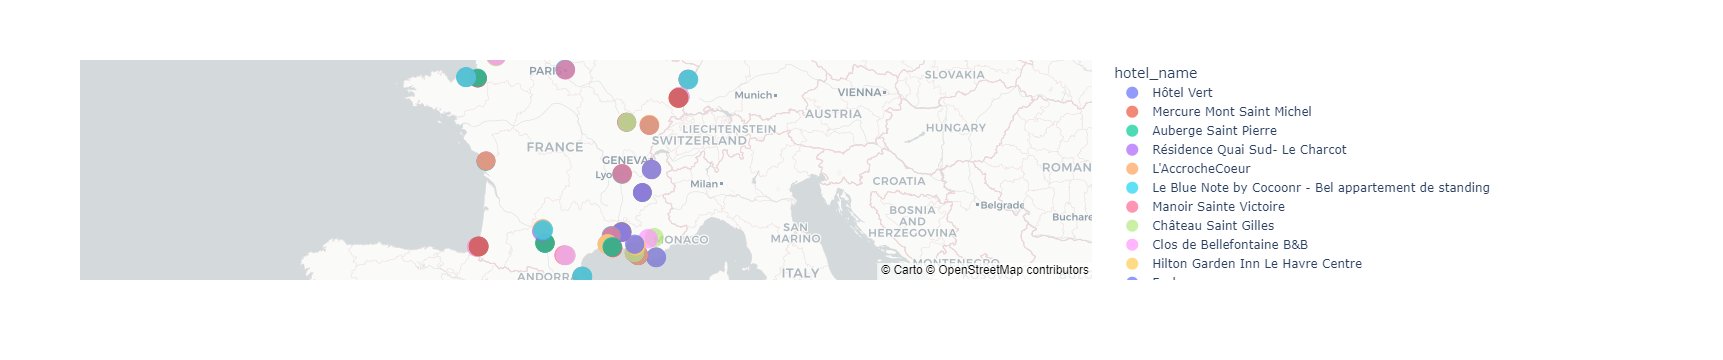

In [60]:
fig = px.scatter_mapbox(top_hotels, lat='lat', lon='lon', mapbox_style='carto-positron', color='hotel_name', size='ratings',size_max=15, zoom=4)
fig.show()

In [ ]:
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())
df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon",     color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

In [ ]:
fig = px.scatter_mapbox()

In [ ]:
fig = px.scatter_mapbox(df_car, lat="centroid_lat", lon="centroid_lon", color="peak_hour", size="car_hours", zoom=10, mapbox_style="carto-positron")
fig.show()